### Kmeans

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio

In [3]:
train_data = scio.loadmat("./ex7data2.mat")
# print(train_data)
X = train_data['X']
print(X.shape)

(300, 2)


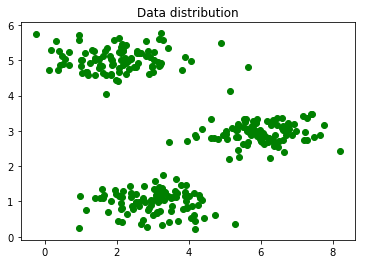

In [10]:
# Plot traing set
fig = plt.figure()  
ax1 = fig.add_subplot(1, 1, 1)  

ax1.set_title('Data distribution')  
plt.xlabel('')   
plt.ylabel('') 

plt.scatter(X[:,0], X[:,1], color='green', marker='o')

plt.show()

In [214]:
def kmeans(X, k, epochs=10, history=False):
    indexes = np.random.choice(len(X), k)
    centro_ids = X[indexes]
    centro_ids_history = [centro_ids]
    for e in range(epochs):
        distance = get_distance(X, centro_ids)
        assignment = np.argmin(distance, axis=1)
        for i in range(len(centro_ids)):
            x_idx = (assignment == i).astype(int)
            selected = X[x_idx == 1]
            if len(selected) == 0:
                continue
            centro_ids[i] = np.mean(selected, axis=0)
        if history is True:
            centro_ids_history.append(np.copy(centro_ids))
#         print('loss:', get_loss(X, centro_ids, assignment))
    return centro_ids, assignment, np.array(centro_ids_history)

def get_distance(X, centro_ids):
    return np.array([[np.sum((x - centro) ** 2) for centro in centro_ids] for x in X])

def get_loss(X, centro_ids, assignment):
    loss = 0
    for i in range(len(centro_ids)):
        x_idx = (assignment == i).astype(int)
        selected = X[x_idx == 1]
        if len(selected) == 0:
            continue
        loss += np.sum(get_distance(selected, centro_ids[i,:]))
    return loss / len(X)

# kmeans(X[:10], 3)

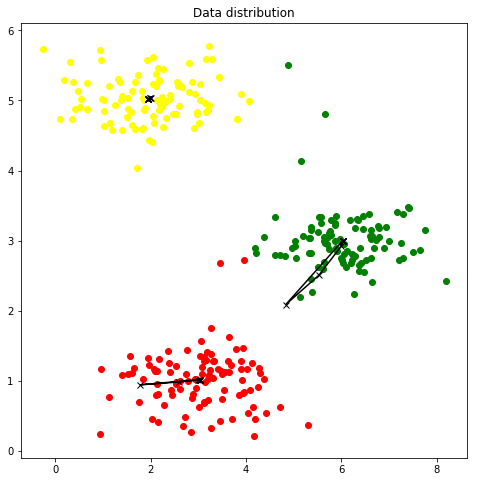

In [218]:
# Try different random initialization and choose the best one
max_ret = kmeans(X, 3)
tries = 10
for i in range(tries):
    ret = kmeans(X, 3, history=True)
    if get_loss(X, ret[0], ret[1]) < get_loss(X, max_ret[0], max_ret[1]):
        max_ret = ret        

centro_ids, assignment, centro_ids_history = max_ret
# print(centro_ids)
# print(assignment)
# print(centro_ids_history.shape)

fig = plt.figure(figsize=(8, 8))  
ax1 = fig.add_subplot(1, 1, 1)  

ax1.set_title('Data distribution')  
plt.xlabel('')   
plt.ylabel('') 

colors = ['green', 'red', 'yellow']
for i in range(len(centro_ids)):
    x_idx = (assignment == i).astype(int)
    selected = X[x_idx == 1]
    plt.scatter(selected[:,0], selected[:,1], color=colors[i], marker='o')

# plot the moving track of the centro
for i in range(len(centro_ids)):
    plt.plot(centro_ids_history[:,i,0], centro_ids_history[:,i,1], color='black', marker='x')
    
plt.show()

#### Image compression with K-means

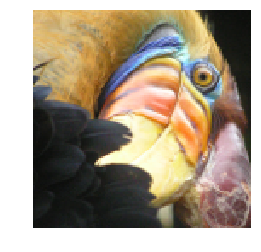

(128, 128, 3)
(16384, 3)


In [219]:
from PIL import Image

img = Image.open('bird_small.png')
fig = plt.figure()
plt.subplot(1, 1, 1)
plt.imshow(img)
plt.axis('off')
plt.show()

# dividing by 255 is very important, otherwise it won't work
# I don't know why
matrix = np.array(img) / 255
print(matrix.shape)
matrix = matrix.reshape(-1, 3)
print(matrix.shape)

In [224]:
dim = 16
max_ret = kmeans(matrix, dim, epochs=10)
# tries = 2
# for i in range(tries):
#     ret = kmeans(matrix, dim)
#     if get_loss(matrix, ret[0], ret[1]) < get_loss(matrix, max_ret[0], max_ret[1]):
#         max_ret = ret        

reduced_colors, assignment, _ = max_ret
print(reduced_colors.shape, assignment.shape)

(16, 3) (16384,)


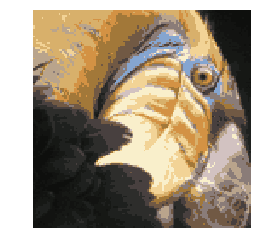

In [225]:
# Build the image using 16 colors
new_matrix = []
for i in range(len(assignment)):
    new_matrix.append(reduced_colors[assignment[i]])
new_matrix = np.array(new_matrix).reshape(128, 128, 3)
new_matrix = (new_matrix * 255).astype(np.uint8)
# print(new_matrix.shape)
# print(new_matrix[:2])

new_img = Image.fromarray(new_matrix)

fig = plt.figure()
plt.subplot(1, 1, 1)
plt.imshow(new_img)
plt.axis('off')
plt.show()

#### Use my own image

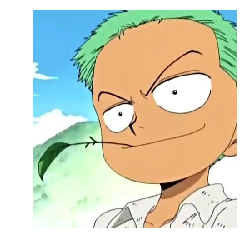

(479, 449, 3)
(215071, 3)


In [226]:
img = Image.open('zuro.jpg')
fig = plt.figure()
plt.subplot(1, 1, 1)
plt.imshow(img)
plt.axis('off')
plt.show()

# dividing by 255 is very important, otherwise it won't work
# I don't know why
matrix = np.array(img) / 255
print(matrix.shape)
matrix = matrix.reshape(-1, 3)
print(matrix.shape)

In [228]:
dim = 16
max_ret = kmeans(matrix, dim, epochs=2)

reduced_colors, assignment, _ = max_ret
print(reduced_colors.shape, assignment.shape)

(16, 3) (215071,)


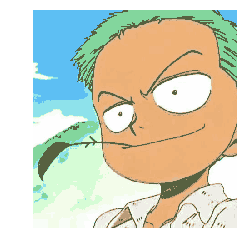

In [229]:
new_matrix = []
for i in range(len(assignment)):
    new_matrix.append(reduced_colors[assignment[i]])
new_matrix = np.array(new_matrix).reshape(479, 449, 3)
new_matrix = (new_matrix * 255).astype(np.uint8)

new_img = Image.fromarray(new_matrix)

fig = plt.figure()
plt.subplot(1, 1, 1)
plt.imshow(new_img)
plt.axis('off')
plt.show()